<br>

나스닥 지수와 코스닥 지수가 상당히 연동되어 움직이는 것을 그래프로 확인할 수 있었습니다. 미국 3대 지수의 수익율에 따라 코스닥 지수의 수익율이 어떻게 변화는 지 알아보겠습니다.

In [226]:
import yfinance as yf
import pandas as pd
import numpy as np

nasdaq = yf.download('^IXIC', start = '2021-01-01', end = '2022-06-30') # 나즈닥
dowjones = yf.download('^DJI', start = '2021-01-01', end = '2022-06-30') # 다우존스
sp500 =  yf.download('^GSPC', start = '2021-01-01', end = '2022-06-30') # S&P 500
kospi =  yf.download('^KS11', start = '2021-01-01', end = '2022-06-30') # 코스피
kosdaq =  yf.download('^KQ11', start = '2021-01-01', end = '2022-06-30') # 코스닥

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [261]:
nasdaq['ns_return'] = nasdaq['Close']/nasdaq['Close'].shift(1)
sp500['sp_return'] = sp500['Close']/sp500['Close'].shift(1)
dowjones['dw_return'] = dowjones['Close']/dowjones['Close'].shift(1)
kosdaq['kq_return'] = kosdaq['Close'].shift(-1)/kosdaq['Open'].shift(-1)
kospi['ks_return'] = kospi['Close'].shift(-1)/kospi['Open'].shift(-1)

nasdaq['ns_count'] = np.where(nasdaq['ns_return']>1.005, 1, 0)
sp500['sp_count'] = np.where(sp500['sp_return']>1, 1, 0)
dowjones['dw_count'] = np.where(dowjones['dw_return']>1, 1, 0)

df = pd.concat([nasdaq[['ns_count','ns_return']], sp500[['sp_count','sp_return']], dowjones[['dw_count','dw_return']], kosdaq['kq_return'], kospi['ks_return']], axis=1, join='inner').dropna()

<AxesSubplot:xlabel='ns_return'>

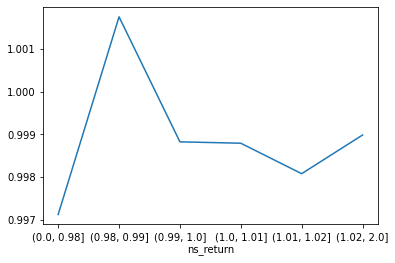

In [278]:
ranks = pd.cut(df['ns_return'], bins=[0, 0.98, 0.99, 1, 1.01, 1.02, 2])
df.groupby(ranks)['kq_return'].mean().plot()

<AxesSubplot:xlabel='sp_return'>

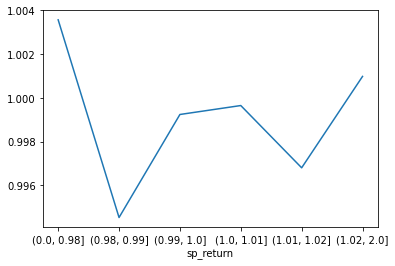

In [279]:
ranks = pd.cut(df['sp_return'], bins=[0, 0.98, 0.99, 1, 1.01, 1.02, 2])
df.groupby(ranks)['kq_return'].mean().plot()

<AxesSubplot:xlabel='dw_return'>

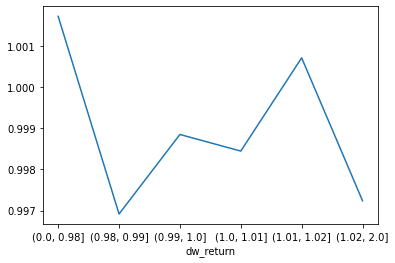

In [280]:
ranks = pd.cut(df['dw_return'], bins=[0, 0.98, 0.99, 1, 1.01, 1.02, 2])
df.groupby(ranks)['kq_return'].mean().plot()

<AxesSubplot:xlabel='ns_count,dw_count,sp_count'>

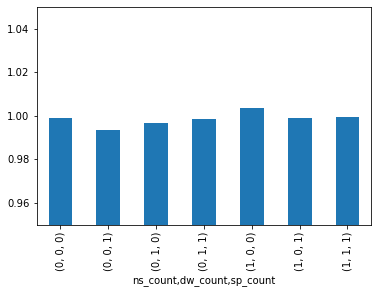

In [270]:
df['ns_return'].between(0.98, 0.99)

In [224]:
df.corr()

,ns_count,ns_return,sp_count,dw_count,kq_return,ks_return
ns_count,1.000000,0.762782,0.750811,0.536720,-0.027420,-0.159735
ns_return,0.762782,1.000000,0.732969,0.604832,0.002776,-0.134240
sp_count,0.750811,0.732969,1.000000,0.768465,0.018355,-0.108590
dw_count,0.536720,0.604832,0.768465,1.000000,0.004116,-0.111781
kq_return,-0.027420,0.002776,0.018355,0.004116,1.000000,0.812194
ks_return,-0.159735,-0.134240,-0.108590,-0.111781,0.812194,1.000000


In [252]:
df.groupby(['ns_count','dw_count','sp_count'])['kq_return'].describe()

count      mean       std       min       25%  \
ns_count dw_count sp_count                                                  
0        0        0         139.0  0.998831  0.012226  0.955705  0.991025   
                  1           7.0  0.994226  0.012000  0.970793  0.992261   
         1        0          24.0  0.994679  0.009950  0.977613  0.988042   
                  1          54.0  1.000195  0.009430  0.967453  0.995940   
1        0        0           4.0  1.005401  0.003982  1.002455  1.003267   
                  1          17.0  0.999556  0.014417  0.957041  0.994000   
         1        1         107.0  0.999814  0.013456  0.953716  0.993710   

                                 50%       75%       max  
ns_count dw_count sp_count                                
0        0        0         1.000629  1.006080  1.031253  
                  1         0.994426  1.000150  1.009544  
         1        0         0.996880  1.000256  1.016711  
                  1         1.002602  1.005537  1.022281  
1        0        0         1.003944  1.006078  1.011259  
                  1         1.002825  1.007799  1.023788  
         1        1         1.000000  1.008438  1.042851

In [255]:
a = (df['ns_count']==1)*(df['dw_count']==0)*(df['sp_count']==0)
mdl = df[a]

In [256]:
""
mdl['kq_return'].describe()

count    4.000000
mean     1.005401
std      0.003982
min      1.002455
25%      1.003267
50%      1.003944
75%      1.006078
max      1.011259
Name: kq_return, dtype: float64

In [258]:
nasdaq = yf.download('^IXIC', start = '2021-07-01', end = '2022-09-15') # 나즈닥
dowjones = yf.download('^DJI', start = '2021-07-01', end = '2022-09-15') # 다우존스
sp500 =  yf.download('^GSPC', start = '2021-07-01', end = '2022-09-15') # S&P 500
kospi =  yf.download('^KS11', start = '2021-07-01', end = '2022-09-15') # 코스피
kosdaq =  yf.download('^KQ11', start = '2021-07-01', end = '2022-09-15') # 코스닥

nasdaq['ns_return'] = nasdaq['Close']/nasdaq['Close'].shift(1)
sp500['sp_return'] = sp500['Close']/sp500['Close'].shift(1)
dowjones['dw_return'] = dowjones['Close']/dowjones['Close'].shift(1)
kosdaq['kq_return'] = kosdaq['Close'].shift(-1)/kosdaq['Open'].shift(-1)
kospi['ks_return'] = kospi['Close'].shift(-1)/kospi['Open'].shift(-1)

nasdaq['ns_count'] = np.where(nasdaq['ns_return']>1.005, 1, 0)
sp500['sp_count'] = np.where(sp500['sp_return']>1, 1, 0)
dowjones['dw_count'] = np.where(dowjones['dw_return']>1, 1, 0)

df = pd.concat([nasdaq[['ns_count','ns_return']], sp500['sp_count'], dowjones['dw_count'], kosdaq['kq_return'], kospi['ks_return']], axis=1, join='inner').dropna()

df.groupby(['ns_count','dw_count','sp_count'])['kq_return'].describe()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


count      mean       std       min       25%  \
ns_count dw_count sp_count                                                  
0        0        0         124.0  0.998892  0.012607  0.955705  0.990519   
                  1           5.0  0.993255  0.014194  0.970793  0.992427   
         1        0          16.0  0.996817  0.008327  0.979179  0.992889   
                  1          40.0  0.998721  0.009287  0.972481  0.990993   
1        0        0           1.0  1.003537       NaN  1.003537  1.003537   
                  1          11.0  0.998910  0.017724  0.957041  0.992773   
         1        1          86.0  0.999516  0.013191  0.953716  0.993237   

                                 50%       75%       max  
ns_count dw_count sp_count                                
0        0        0         1.000691  1.007506  1.026445  
                  1         0.994426  0.999084  1.009544  
         1        0         0.999580  1.001095  1.010148  
                  1         1.000985  1.003916  1.022281  
1        0        0         1.003537  1.003537  1.003537  
                  1         1.002872  1.008793  1.023788  
         1        1         1.000096  1.008126  1.042851

In [111]:
from statsmodels.tsa.stattools import coint
df = pd.concat([sp500['Close'], kosdaq['Close']], axis=1, join='inner').dropna()
df.columns = ['sp_close','kq_close']
score, pvalue, _ = coint(df['sp_close'], df['kq_close'])
print(score, pvalue)

-2.2411490577316107 0.40325638373601774


In [109]:
df = pd.concat([sp500['sp_return'], kosdaq['kq_return']], axis=1, join='inner').dropna()
df[['sp_return','kq_return']].corr()

,sp_return,kq_return
sp_return,1.000000,0.026296
kq_return,0.026296,1.000000


<AxesSubplot:xlabel='sp_return'>

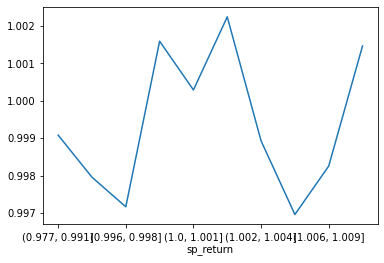

In [110]:
rank = pd.qcut(df['sp_return'], q=10)
df.groupby(rank)['kq_return'].mean().plot()

In [ ]:
# df['buy'] = np.where(df['sp_return']>1.01, 1, 0)

In [85]:
df.groupby('buy')['kq_return'].mean()

buy
0    0.998585
1    0.999343
Name: kq_return, dtype: float64

<AxesSubplot:xlabel='sp_return'>

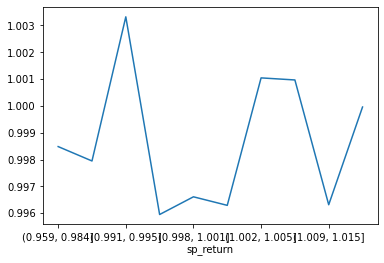

In [93]:
rank = pd.qcut(df['sp_return'], q=10)
df.groupby(rank)['kq_return'].mean().plot()